# 교차 검증 cross-validation
- 모델의 일반화 성능을 평가하는 중요한 기법
## 1. 용어
### 훈련 데이터 Training Data
- 모델을 학습하는 데 사용되는 데이터
### 검증 데이터 Validation Data
- 모델의 성능을 평가하는 데 사용되는 데이터
- 교차 검증에서 검증 데이터가 훈련 데이터에서 분리된 부분
### 테스트 데이터 Test Data
- 최종 모델의 성능을 평가하기 위해 사용되는 데이터
- 교차 검증에는 포함되지 않고, 모델의 최종 평가에 사용
### 폴드 Fold
- 교차 검증에서 데이터를 나누는 각 부분
- 예를 들어, 5-겹 교차 검증에서 데이터는 5개의 폴드로 나뉨
### 에포크 Epoch
- 교차 검증에서 모델을 학습할 때, 각 폴드에 대해 반복적으로 훈련하고 검증하는 과정
## 2. 개념
- 데이터를 여러 부분으로 나누어 모델을 평가하고 성능을 측정하는 기법
- 모델의 일반화 성능을 정확하게 평가하기 위해 데이터의 다양한 서브셋을 사용
- 모델의 성능을 높이고 과적합을 방지하는데 유용한 도구
## 3. 교차 검증의 주요 유형
### K-겹 교차 검증 K-Fold Cross-Validation
- 데이터를 K개 폴드로 나눠, K번 훈련 및 검증을 반복
- 각 폴드는 검증 데이터로 사용되며 나머지 K-1개의 폴드는 훈련 데이터로 사용
- 절차
    1. 데이터를 K개의 폴드로 나눔
    2. 각 폴드를 검증 세트로 사용하고, 나머지 K-1개의 폴드를 훈련 세트로 사용하여 모델을 학습
    3. 모든 폴드에서 성능을 평가하고, 평균 성능을 계산
- 장점
    - 모든 데이터 포인트가 검증에 사용되기 때문에 데이터의 효율적인 활용이 가능
- 단점
    - K가 클 경우 계산 비용이 증가할 수 있음
### LOOCV ; Leave-One-Out-Cross-Validation
- K-겹 교차 검증에서 K가 데이터의 총 개수와 동일한 경우
- 즉, 각 폴드에 하나의 데이터 포인트만 포함되고 나머지 데이터 포인트로 모델을 학습
- 장점
    - 데이터의 최대한 활용이 가능
    - 모델의 일반화 성능을 정확하게 평가
- 단점
    - 데이터가 많을 때 계산 비용이 매우 높을 수 있음
### 계층적 교차 검증 Stratified Cross-Validation
- K-겹 교차 검증에서 각 폴드가 원본 데이터의 클래스 분포를 유지하도록 데이터가 나뉨
- 주로 불균형 데이터 셋에서 사용
- 장점 
    - 클래스 불균형을 고려하여 신뢰할 수 있는 성능 평가 가능
### 시계열 교차 검증 Time Series Cross-Validation
- 시계열 데이터의 경우, 시간 순서를 고려하여 교차 검증을 수행
- 데이터를 순서대로 나누어 훈련 및 검증 진행
- 장점
    - 시계열 데이터의 시간적 의존성을 고려할 수 있음
## 4. 수식
### 모델의 성능 평가
- 교차 검증에서 각 폴드에서 얻은 성능 지표를 평균내어 전체 모델 성능을 평가
- 정확도Accuracy, 정밀도Precision, 재현율Recall 등

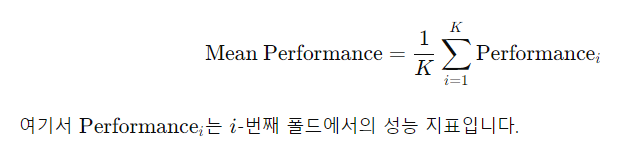

## 5. 장점
- 데이터의 다양한 부분을 사용하여 모델의 일반화 성능을 평가
- 모든 데이터 포인트가 검증 데이터로 사용되기 때문에 데이터 활용이 극대화 됨
## 6. 단점
- 많은 폴드를 사용할 경우 계산 비용 증가
- 교차 검증을 설정하고 결과를 해석하는데 복잡

In [11]:
import pandas as pd
import numpy as np

# K-겹 교차 검증

In [6]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# 데이터 로드
fish = pd.read_csv(r'https://bit.ly/fish_csv')

# 입력 데이터와 타겟 데이터 분리
X = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']]
y = fish['Species']

# 데이터 분할
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# 데이터 스케일링
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_val_scaled = ss.transform(X_val)
X_test_scaled = ss.transform(X_test)

# K겹 교차 검증을 위한 KFold 정의
# 5개의 폴드로 나누어 교차 검증 수행
# shuffle=True는 데이터를 섞어서 교차 검증을 더 정확하게 수행
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# KNN 모델 정의
knn_model = KNeighborsClassifier(n_neighbors=3)

# SVM 모델 정의
svm_model = SVC(kernel='linear')

# 로지스틱 회귀 모델 정의
logistic_model = LogisticRegression(max_iter=200)

# 각 모델에 대해 K겹 교차 검증 수행
knn_scores = cross_val_score(knn_model, X_train_scaled, y_train, cv=kfold)
svm_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=kfold)
logistic_scores = cross_val_score(logistic_model, X_train_scaled, y_train, cv=kfold)

# 결과 출력
print(f"KNN Cross-Validation Scores: {knn_scores}")
print(f"KNN Mean Accuracy: {knn_scores.mean():.2f}")

print(f"SVM Cross-Validation Scores: {svm_scores}")
print(f"SVM Mean Accuracy: {svm_scores.mean():.2f}")

print(f"Logistic Regression Cross-Validation Scores: {logistic_scores}")
print(f"Logistic Regression Mean Accuracy: {logistic_scores.mean():.2f}")

KNN Cross-Validation Scores: [0.78947368 0.68421053 0.73684211 0.63157895 0.73684211]
KNN Mean Accuracy: 0.72
SVM Cross-Validation Scores: [0.89473684 0.68421053 0.73684211 0.84210526 0.78947368]
SVM Mean Accuracy: 0.79
Logistic Regression Cross-Validation Scores: [0.89473684 0.57894737 0.73684211 0.84210526 0.78947368]
Logistic Regression Mean Accuracy: 0.77


### 결과 해석
- K겹-교차 검증 과정에서 각 폴드에 대한 모델의 성능을 나타내는 정확도 점수
- 5개 각 폴드의 정확도와 평균 정확도

KNN Cross-Validation Scores: [0.78947368 0.68421053 0.73684211 0.63157895 0.73684211]
KNN Mean Accuracy: 0.72
- KNN 평균 정확도 72%
- KNN의 정확도가 다양한 폴드에서 편차가 큰 편
- 가장 낮은 정확도는 63%
- KNN이 데이터의 특정 부분에 좋은 성능을 보이나, 다른 부분에서 성능이 떨어짐
- 데이터 특성에 따라 불안정할 수 있고. 특정 폴드에서 성능이 안좋음

SVM Cross-Validation Scores: [0.89473684 0.68421053 0.73684211 0.84210526 0.78947368]
SVM Mean Accuracy: 0.79
- SVM 평균 정확도 79%
- 대체로 KNN보다 전반적으로 정확도 높아보임
- 교차 검증 결과에서도 더 안정적인 성능
- 다양한 정확도를 통해 폴드마다 성능의 변동이 있지만, 평균적으로 가장 높은 성능
- 데이터에 대한 일반화 성능이 우수할 가능성이 높음

Logistic Regression Cross-Validation Scores: [0.89473684 0.57894737 0.73684211 0.84210526 0.78947368]
Logistic Regression Mean Accuracy: 0.77
- Logistic Regression 평균 정확도 77%
- 성능의 변동 폭이 큰 편
- 일부 데이터에서는 성능 떨어짐

# LOOCV 교차 검증

In [8]:
# LOOCV 불러오기
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score

fish_target = fish['Species'].to_numpy()
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

# 모델 정의
knn_model = KNeighborsClassifier(n_neighbors=3)
svm_model = SVC(kernel='linear')
logistic_model = LogisticRegression(max_iter=200)

# LOOCV 객체 생성
loo = LeaveOneOut()

# LOOCV로 모델 평가할 거임
# 각 폴드를 검증 데이터로 사용
# 나머지 훈련 데이터로 사용하여 모델 훈련, 평가
def evaluate_model(model, X, y):
    accuracies = []
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
    
    return accuracies

# KNN 모델 평가
knn_accuracies = evaluate_model(knn_model, fish_input, fish_target)
print(f"KNN LOOCV Accuracy: {knn_accuracies}")
print(f"KNN LOOCV Mean Accuracy: {sum(knn_accuracies) / len(knn_accuracies):.2f}")

# SVM 모델 평가
svm_accuracies = evaluate_model(svm_model, fish_input, fish_target)
print(f"SVM LOOCV Accuracy: {svm_accuracies}")
print(f"SVM LOOCV Mean Accuracy: {sum(svm_accuracies) / len(svm_accuracies):.2f}")

# 로지스틱 회귀 모델 평가
logistic_accuracies = evaluate_model(logistic_model, fish_input, fish_target)
print(f"Logistic Regression LOOCV Accuracy: {logistic_accuracies}")
print(f"Logistic Regression LOOCV Mean Accuracy: {sum(logistic_accuracies) / len(logistic_accuracies):.2f}")

KNN LOOCV Accuracy: [0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
KNN LOOCV Mean Accuracy: 0.52
SVM LOOCV Accuracy: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0

c:\Users\utw09\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\utw09\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Logistic Regression LOOCV Accuracy: [0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0]
Logistic Regression LOOCV Mean Accuracy: 0.83


c:\Users\utw09\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\utw09\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

### LOOCV 장점
- 각 훈련 데이터가 N-1개의 샘플로 구성되어 있어 훈련 데이터의 거의 모든 샘플이 사용
- 전체 데이터 셋을 검증 데이터로 사용하여 모델의 성능을 평가
### LOOCV 단점
- 데이터가 많은 경우 N번의 훈련, 평가를 수행하므로 계산 비용 높음
- 데이터의 크기가 커지면 훈련시간 증가

### 결과 해석
- LOOCV의 각 폴드에서 해당하는 샘플의 예측이 올바른지 여부를 0, 1로 표현
- 0 : 예측 틀림
- 1 : 예측 맞음
- 데이터 셋의 샘플 수 만큼 여부 확인
- 1의 비율이 높으면, 해당 모델이 대부분의 경우 정확히 예측한다고 해석
- 전체 정확도 계산 : 각 샘플에 대한 정확도를 평균내어 전체 모델의 성능을 평가

KNN LOOCV Accuracy: [0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

KNN LOOCV Mean Accuracy: 0.52

SVM LOOCV Accuracy: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

SVM LOOCV Mean Accuracy: 0.95

Logistic Regression LOOCV Accuracy: [0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0]

Logistic Regression LOOCV Mean Accuracy: 0.83

# 계층적 교차 검증

In [10]:
from sklearn.model_selection import StratifiedKFold

# 계층적 K-겹 교차 검증 설정
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# KNN에 대한 계층적 교차 검증
knn_accuracies = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    knn_model = KNeighborsClassifier(n_neighbors=3)
    knn_model.fit(X_train, y_train)
    knn_y_pred = knn_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, knn_y_pred)
    knn_accuracies.append(accuracy)

# SVM에 대한 계층적 교차 검증

svm_accuracies = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    svm_model = SVC(kernel='linear')
    svm_model.fit(X_train, y_train)
    svm_y_pred = svm_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, svm_y_pred)
    svm_accuracies.append(accuracy)

# Logistic Regression에 대한 계층적 교차 검증

logistic_accuracies = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    logistic_model = LogisticRegression(max_iter=200)
    logistic_model.fit(X_train, y_train)
    logistic_y_pred = logistic_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, logistic_y_pred)
    logistic_accuracies.append(accuracy)

print(f"KNN Cross-Validation Scores: {knn_accuracies}")
print(f"KNN Mean Accuracy: {sum(knn_accuracies) / len(knn_accuracies):.2f}")

print(f"SVM Cross-Validation Scores: {svm_accuracies}")
print(f"SVM Mean Accuracy: {sum(svm_accuracies) / len(svm_accuracies):.2f}")

print(f"Logistic Regression Cross-Validation Scores: {logistic_accuracies}")
print(f"Logistic Regression Mean Accuracy: {sum(logistic_accuracies) / len(logistic_accuracies):.2f}")

KNN Cross-Validation Scores: [0.53125, 0.5, 0.53125, 0.625, 0.5483870967741935]
KNN Mean Accuracy: 0.55
SVM Cross-Validation Scores: [0.96875, 0.9375, 0.96875, 0.9375, 0.9354838709677419]
SVM Mean Accuracy: 0.95
Logistic Regression Cross-Validation Scores: [0.78125, 0.9375, 0.8125, 0.71875, 0.8387096774193549]
Logistic Regression Mean Accuracy: 0.82


c:\Users\utw09\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\utw09\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

### 결과 해석
KNN Cross-Validation Scores: [0.53125, 0.5, 0.53125, 0.625, 0.5483870967741935]

KNN Mean Accuracy: 0.55

SVM Cross-Validation Scores: [0.96875, 0.9375, 0.96875, 0.9375, 0.9354838709677419]

SVM Mean Accuracy: 0.95

Logistic Regression Cross-Validation Scores: [0.78125, 0.9375, 0.8125, 0.71875, 0.8387096774193549]

Logistic Regression Mean Accuracy: 0.82

- 각 모델에 대해 K개의 폴드에서 계산된 정확도 점수
- 모든 포드의 정확도를 평균하여 모델 전체 성능 평가

## 요약
- 그동안 훈련 데이터에서 모델을 훈련하고, 테스트 데이터에서 모델을 평가했다. 테스트 데이터에서 얻은 점수를 보고 일반화 성능을 가늠해 보는데, 매개변수를 사용한 하이퍼파라미터를 튜닝을 할 때 자꾸 테스트 데이터를 활용하게 되면, 점점 테스트 데이터에 맞는 모델이 만들어 진다. 그렇다고 테스트 데이터를 사용하지 않으면, 과대적합, 과소적합을 판단하기 어려워진다.
- 이를 방지하기 위해 검증 데이터를 만들어 위를 방지한다. 훈련 데이터로 모델을 훈련시키고, 검증 데이터로 모델을 평가하며, 테스트하고 싶은 매개변수를 바꿔가며 모델을 최적화시킨 후, 마지막에 테스트 데이터를 이용해 최종 점수를 평가한다. 